# Project Name : - Flight Fare Prediction
1. Problem Statement
• This Dataset comprises of flight price taken from Kaggle
• A user can predict the price of the Flight Fare based on input features.
• Prediction results can be useful for traveller to get suggested pric

In [1]:
## importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading flight data
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
# summary of the dataset
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
# let's look relationship between numeric feature
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Data Exploring

In [7]:
# define numerical $ categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='0']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='0']

#print columns
print(f'we have {len(numeric_features)} numerical features :{numeric_features}')
print(f'we have {len(categorical_features)} categorical features :{categorical_features}')

we have 11 numerical features :['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']
we have 0 categorical features :[]


## Feature Information
• Airline: Name of the Airline from which the Ticket is Booked.

• Date_of_Journey: Date of Journey of the Traveller.

• Source: Source from which the Airline Would Departure.

• Destination: Destination to Which Airline Would Arrive.

• Route: Route of the Airline from Source to Destination.

• Dep_Time: Time at which Flight Would Departure from the Source.

• Arrival_Time: Time at which Flight Would Arrive at the Destination.

• Duration: Duration that Airline Takes to fly from Source to Destination.

• Total_Stops: Total No of Stops that Airline takes Between Source and Destination.

• Additional_Info: Any Additional Info about the Airline.

• Price: Fare of the Ticket to fly from Source to Destination

In [8]:
df.value_counts()

Airline                  Date_of_Journey  Source    Destination  Route                  Dep_Time  Arrival_Time  Duration  Total_Stops  Additional_Info              Price
Jet Airways              27/05/2019       Delhi     Cochin       DEL → AMD → BOM → COK  19:10     19:00 28 May  23h 50m   2 stops      No info                      15129    3
                         18/05/2019       Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 19 May  22h 55m   2 stops      In-flight meal not included  13029    3
Air India                24/06/2019       Delhi     Cochin       DEL → GOI → BOM → COK  22:00     19:15 25 Jun  21h 15m   2 stops      No info                      9181     3
Jet Airways              9/05/2019        Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 10 May  22h 55m   2 stops      In-flight meal not included  13029    3
                         1/06/2019        Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 02 Jun  22h 55m   2 stops 

In [9]:
df.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [10]:
# proportion of count data of each categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('----------------------------')

In [11]:
for i in categorical_features:
    print(df[i].value_counts(normalize=True)*100)

## Univariate Analysis
• The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.”
The purpose of univariate analysis is to understand the distribution of values for a singl

## categorical features

In [12]:
df.columns.unique()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

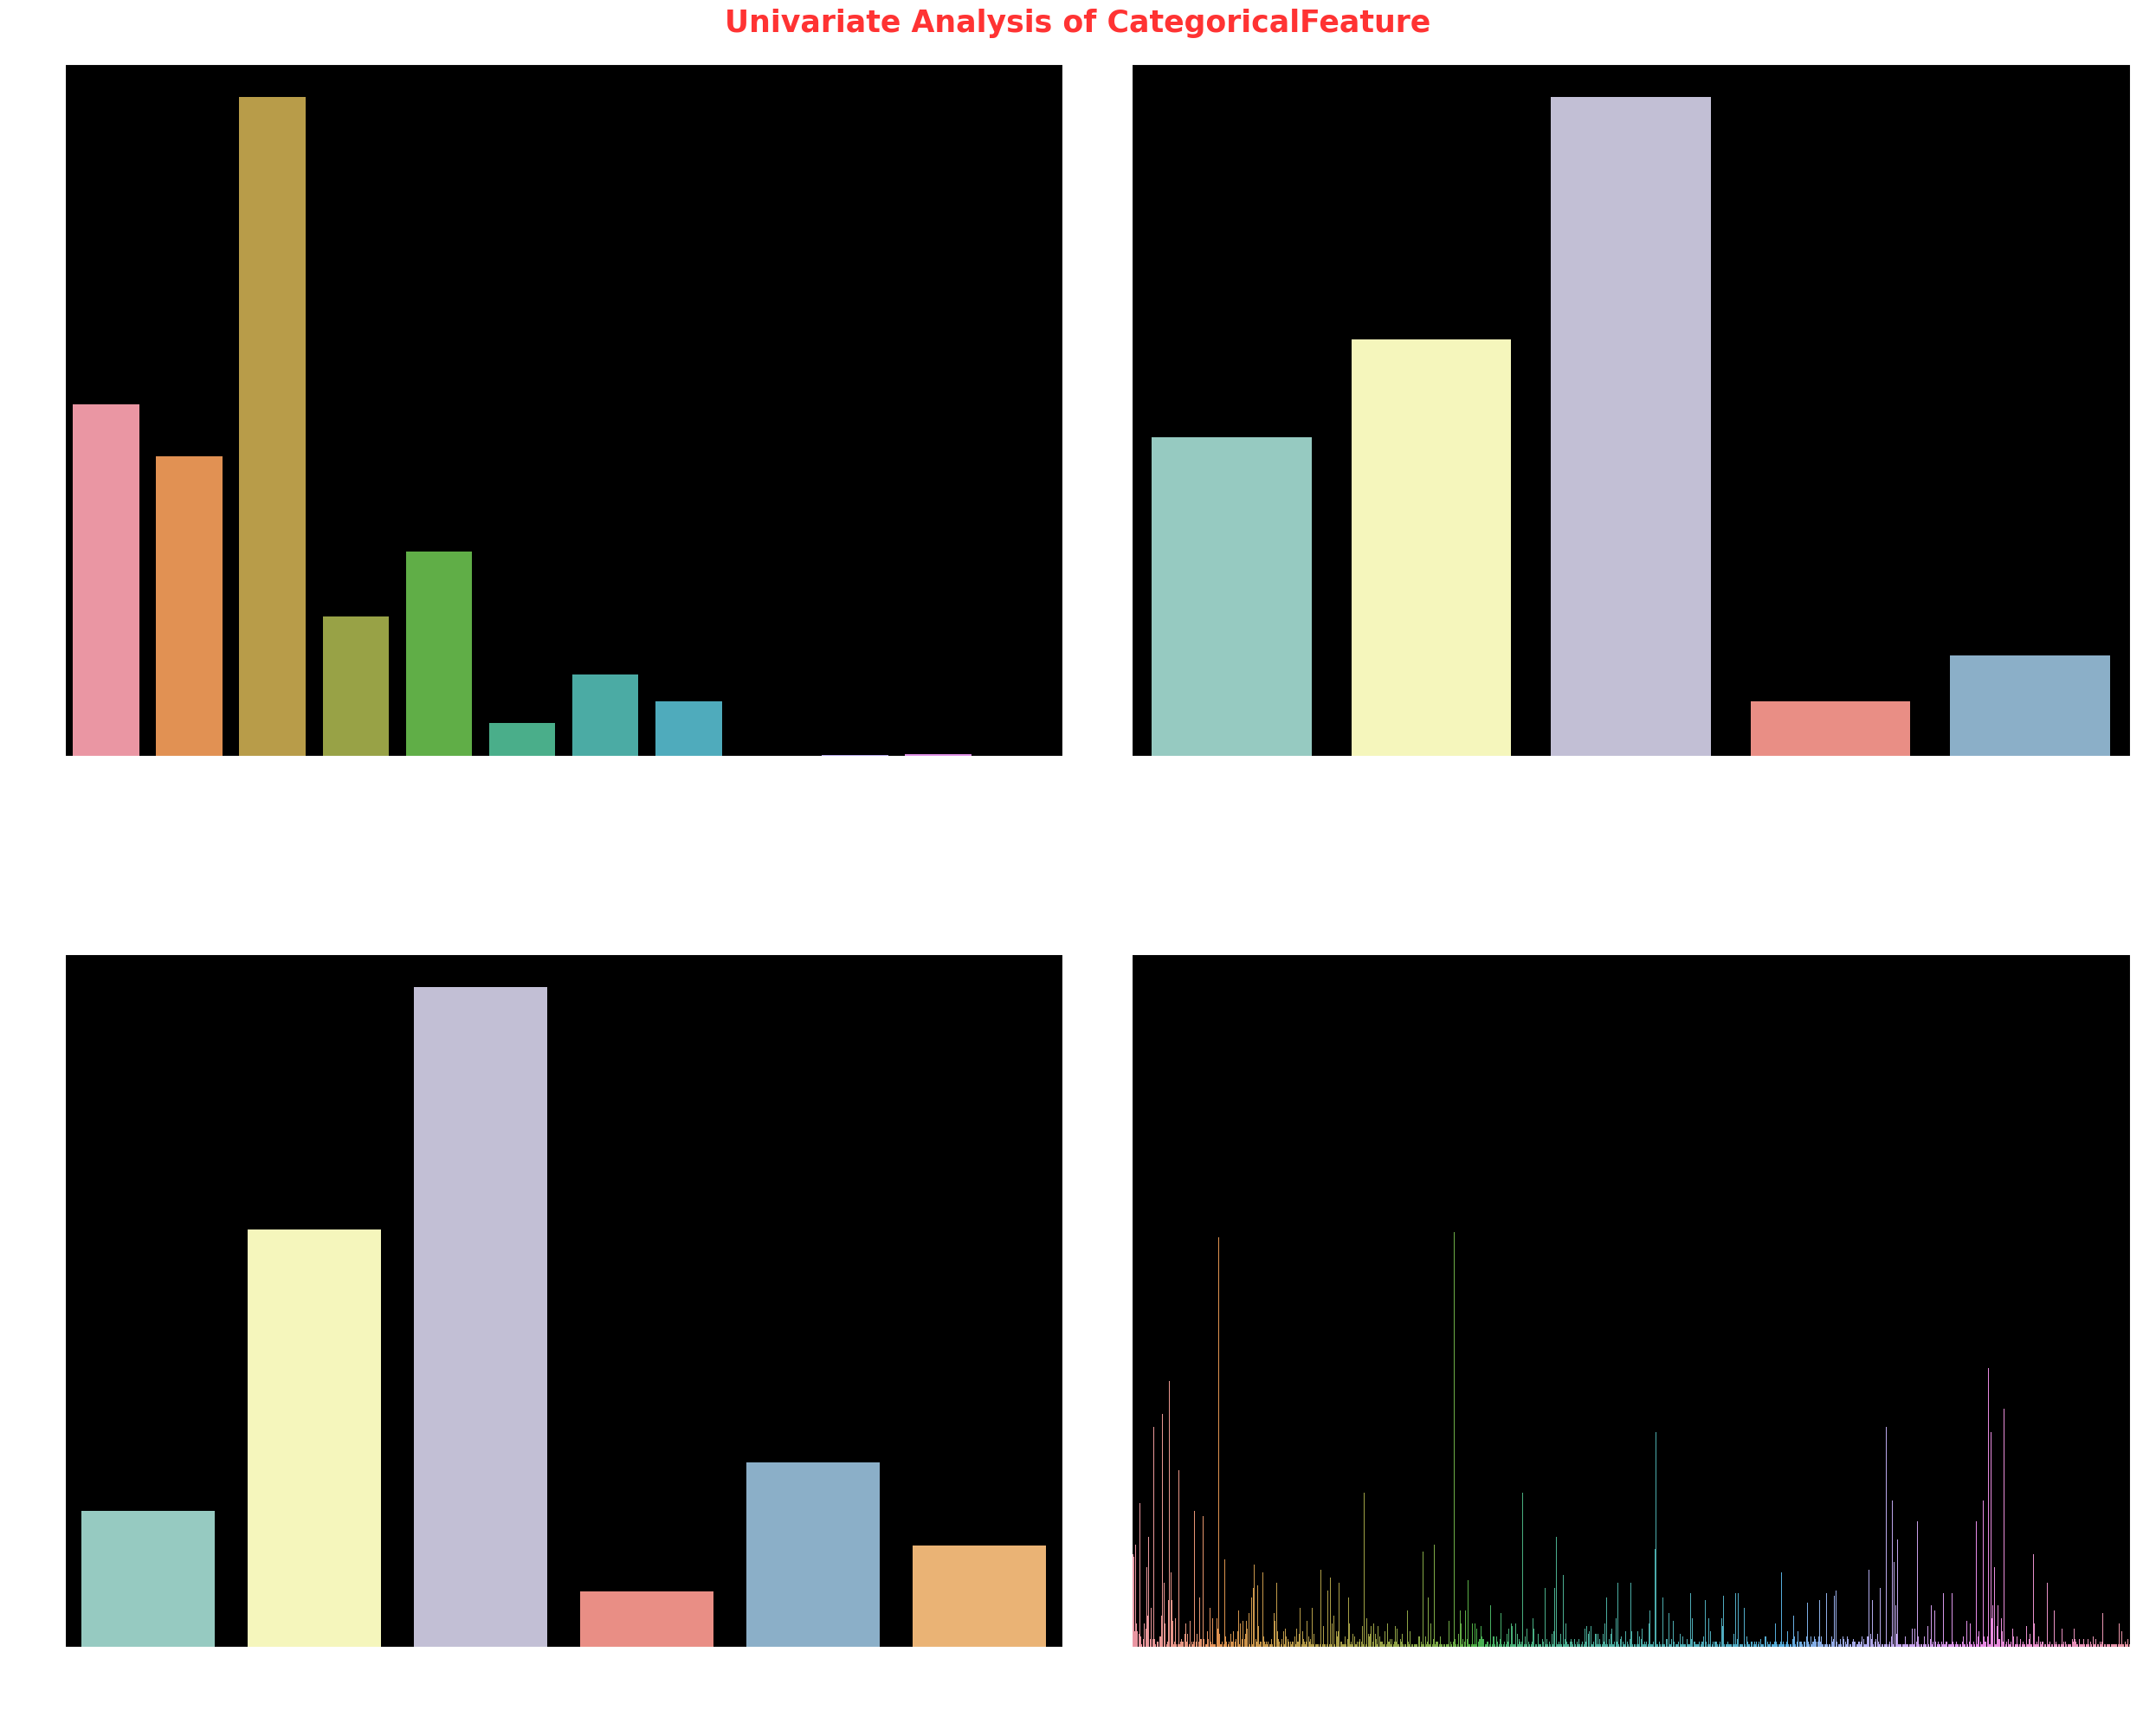

In [13]:
 plt.figure(figsize=(25,20))
plt.suptitle('Univariate Analysis of CategoricalFeature',fontsize=25,fontweight='bold',alpha=0.8,y=1.,color='red',)
cat1=['Airline','Source','Destination','Price',]
plt.style.use('dark_background')
plt.rcParams.update({
 'text.color': 'white' # set the color of the text
})

for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

• Multivariate ansalysis is the analysis of more than one variable

 Check Multicollinearity for Categorical features
    
• A chi-squared test (also chi-square or fi2 test) is a statistical hypothesis test that
is valid to perform when the test statistic is chi-squared distributed under the
null hypothesis, specifically Pearson’s chi-squared test

• A chi-square statistic is one way to show a relationship between two categorical
variables.

• Here we test correlation of Categorical columns with Target column i.e Pric

In [14]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Price'],df[feature]))[1] <0.05:
        chi2_test.append('Rejet Null Hypothesis')
        
    else:
            chi2_test.append('Fail to Reject Null Hypothesis')
result=pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns=['Column','Hypothesis Result']
result

,Column,Hypothesis Result


In [15]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Initial Analysis Report
Report * Jet Airways has highest customer footfall followed by Indigo and Air India .
* Jet Airways has a market Share of 36.03 % followed by Indigo which has a market
share of 19.22 % and Air India Which has market share of 16.40 % . * Delhi has the
highest footfall for source and Cochin has the highest footfall for Destination .

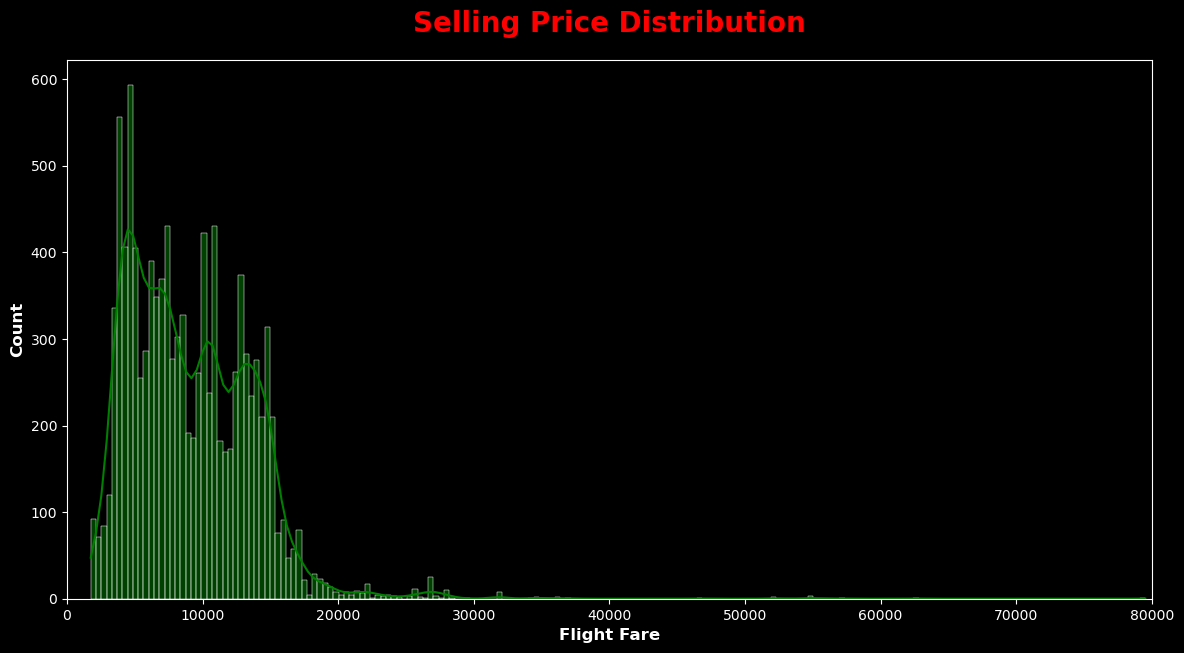

In [19]:
plt.subplots(figsize=(14,7))
sns.histplot(df.Price, bins=200, kde=True, color = 'green')
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.title("Selling Price Distribution", weight="bold",fontsize=20,pad=20,color='red')
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight Fare", weight="bold", fontsize=12)
plt.xlim(0,80000)
plt.show()

In [20]:
# from the chart it is clear that the Target varaible is skewed
df.Airline.value_counts()[0:10]

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: Airline, dtype: int64

In [21]:
# Most of the sold tickets are of the Jet Airways Airline

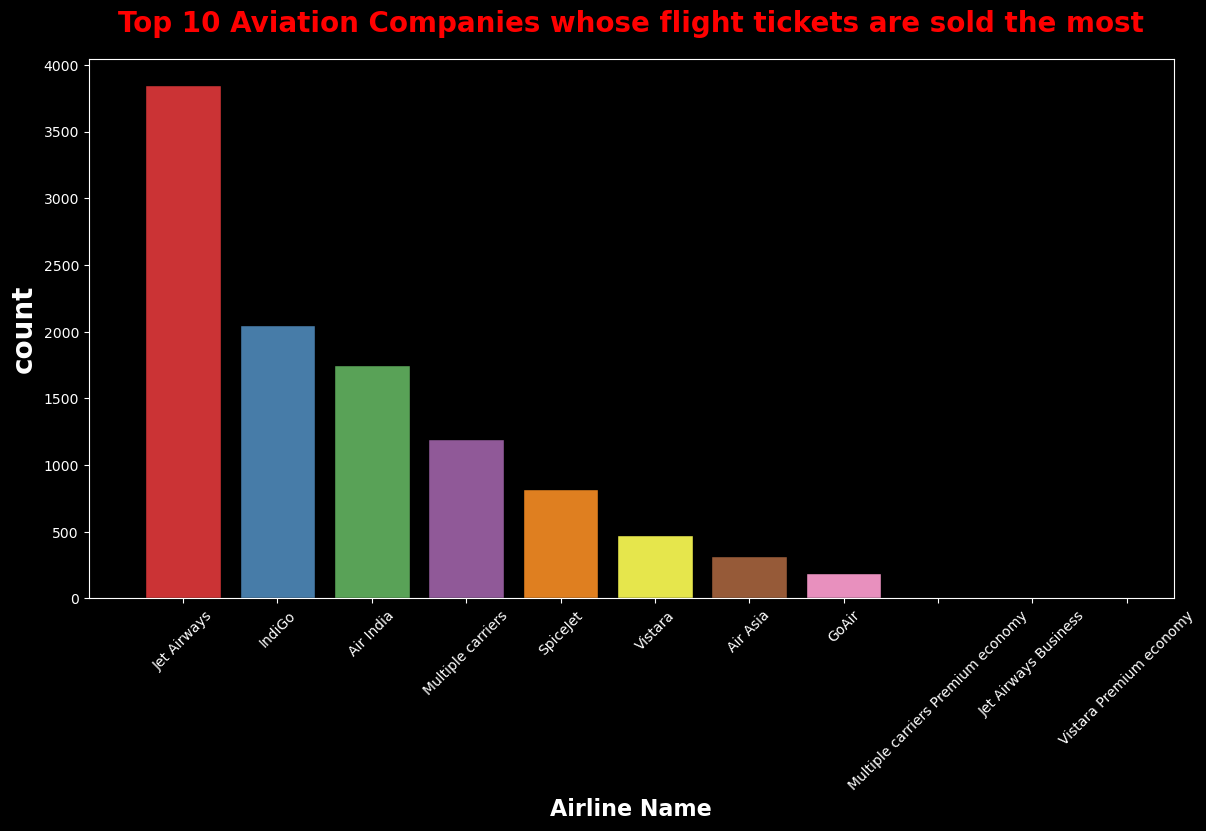

In [22]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Airline", data=df,ec = "black",palette="Set1",order =df['Airline'].value_counts().index)
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most",weight="bold",fontsize=20, pad=20,color='red')
plt.ylabel('count',weight='bold',fontsize=20)
plt.xlabel('Airline Name',weight='bold',fontsize=16)
plt.xticks(rotation=45)
plt.xlim(-1,10.5)
plt.show()

In [23]:
# check mean price of Jet Airways whose flight tickets are sold the most

In [24]:
jet_airways = df[df['Airline'] == 'Jet Airways']['Price'].mean()
print(f'The mean price of Jet Airways Flight Tickets is {jet_airways:.2f}Rupees')

The mean price of Jet Airways Flight Tickets is 11643.92Rupees


In [25]:
aviation_company_airline = df.groupby('Airline').Price.max()
aviation_company= aviation_company_airline.to_frame().sort_values('Price',ascending=False)[0:10]
aviation_company


,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


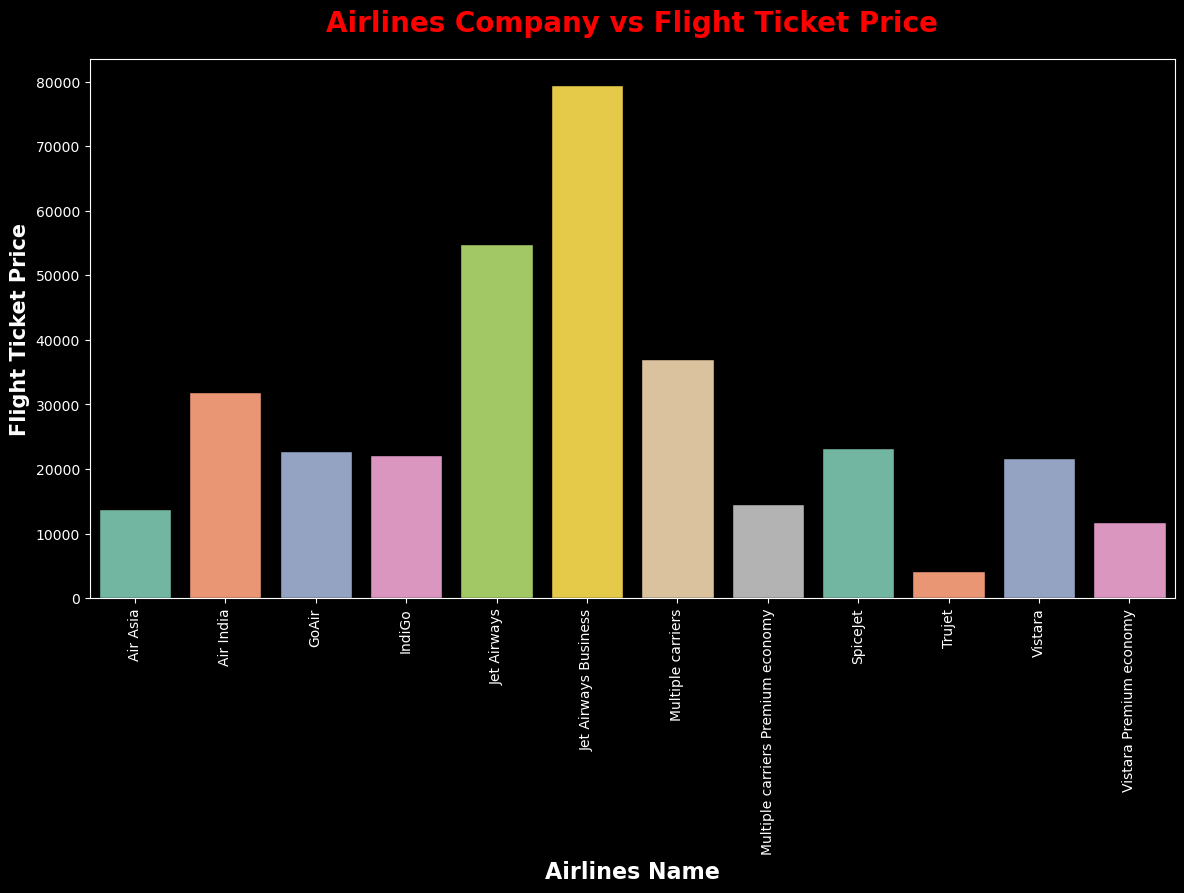

In [26]:
plt.subplots(figsize=(14,7))
sns.barplot(x=aviation_company_airline.index, y=aviation_company_airline.values,ec = "black",palette="Set2")
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.title("Airlines Company vs Flight Ticket Price", weight="bold",fontsize=20,pad=20,color='red')
plt.ylabel("Flight Ticket Price", weight="bold", fontsize=15)
plt.xlabel("Airlines Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [27]:
# Extracting Date, Month & Day from Date_Of_Journey Feature

In [28]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [29]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [30]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],infer_datetime_format=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


In [32]:
df['Day']=df['Date_of_Journey'].dt.day
df['Month']=df['Date_of_Journey'].dt.month
df['Year']=df['Date_of_Journey'].dt.year

In [33]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [34]:
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [35]:
# now extraction for departure time
df['Deep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour #pd.to_datetime
#Extracting minutes
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
#Now we will drop the dep_time, no use
df.drop(['Dep_Time'],axis=1,inplace=True)

In [36]:
# now extraction for arrival_time
# extracting hours
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour #pd.to_datetime
#Extracting minutes
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
#Now we will drop the dep_time, no use
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Day              10682 non-null  int64 
 9   Month            10682 non-null  int64 
 10  Year             10682 non-null  int64 
 11  Deep_hour        10682 non-null  int64 
 12  Dep_min          10682 non-null  int64 
 13  Arrival_hour     10682 non-null  int64 
 14  Arrival_min      10682 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.3+ MB


In [38]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Deep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [39]:
# now for duration column
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Deep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [40]:
# Assigning and converting Duration column into list to extract hours ansminutes seperately
duration = list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2: # Check if duration contains only hour ormins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i] # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
     duration_hours.append(int(duration[i].split(sep = "h")[0])) # Extracthours from duration
duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) # extracts only minutes from duration

In [41]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Deep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Day              10682 non-null  int64 
 9   Month            10682 non-null  int64 
 10  Year             10682 non-null  int64 
 11  Deep_hour        10682 non-null  int64 
 12  Dep_min          10682 non-null  int64 
 13  Arrival_hour     10682 non-null  int64 
 14  Arrival_min      10682 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.3+ MB


## Handling Categorical Data:
Airline, Source, Destination, Route, Total_Stops, Additional_info are the categorical
variables we have in our data.
Let’s handle each one by one.
Nominal data → are not in any order → OneHotEncoder is used in this case
Ordinal data → are in order → LabelEncoder is used in this case
Trying to find out unique values in column Airline and counts of the unique values as
well.

* Boxplots
Airline vs Price:
    
• Let’s see how the Airline variable is related to the Price variable.
• From the above we can see that Jet Airways Busines has premium flight fares as compared
to other Airlines
• Some Outlier value present above see Diagram

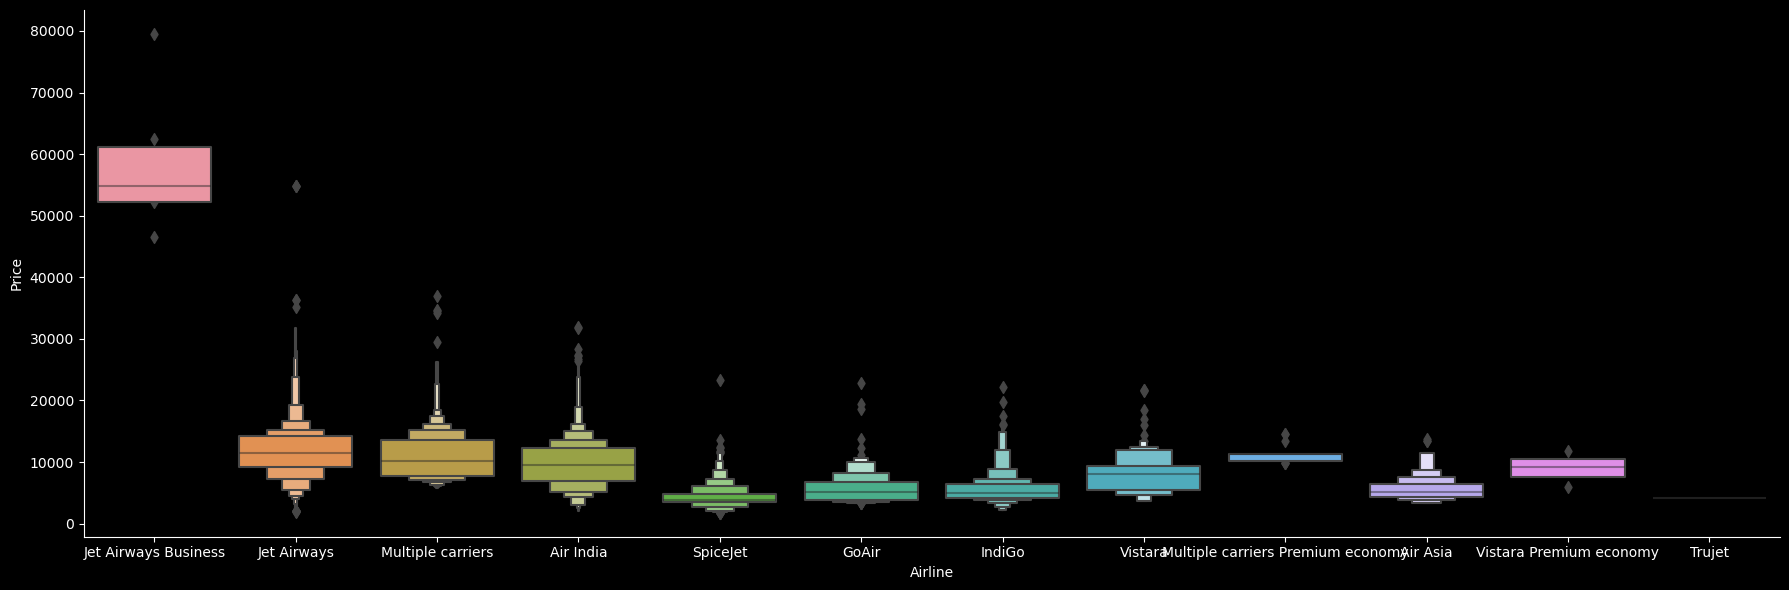

In [43]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price",ascending = False), kind="boxen", height = 6, aspect = 3)
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.show()

In [44]:
# OneHotEncoding ------> Nominal data
Airline = df[["Airline"]]
Airline =pd.get_dummies(df['Airline'],drop_first=False)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


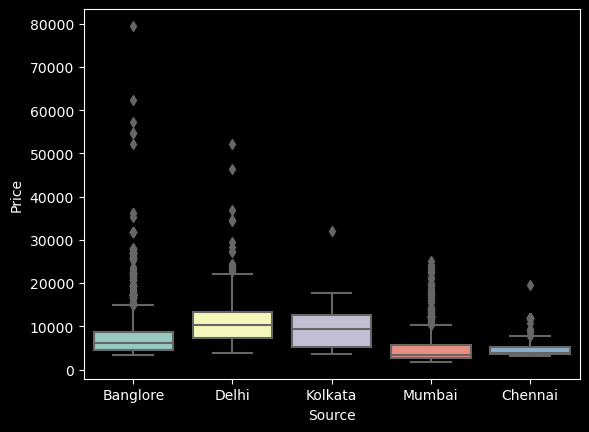

In [45]:
# source vs price
sns.boxplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending= False))
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.show()

In [46]:
#OneHotEncoding -----> Nominal data
Source = df[["Source"]]
Source = pd.get_dummies(df['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [47]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [48]:
# droping column, because Additinal_info has since 80 % has no information
# Route---> is related to no of stops
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Deep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,2019,16,50,21,35


In [49]:
df['Total_Stops'].unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [50]:
df['Total_Stops'].value_counts()
# As this is case of Ordinal Categorical type we perform LabelEncoder
#we replace the values in key values
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Deep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,16,50,21,35


# Correlation:
* Correlation is a technique for determining the link between two variables, which
is useful in real life since it allows us to forecast the value of one variable using other factors that
are connected with it. Because two variables are involved, it is a sort of bivariate statistic.

<Axes: >

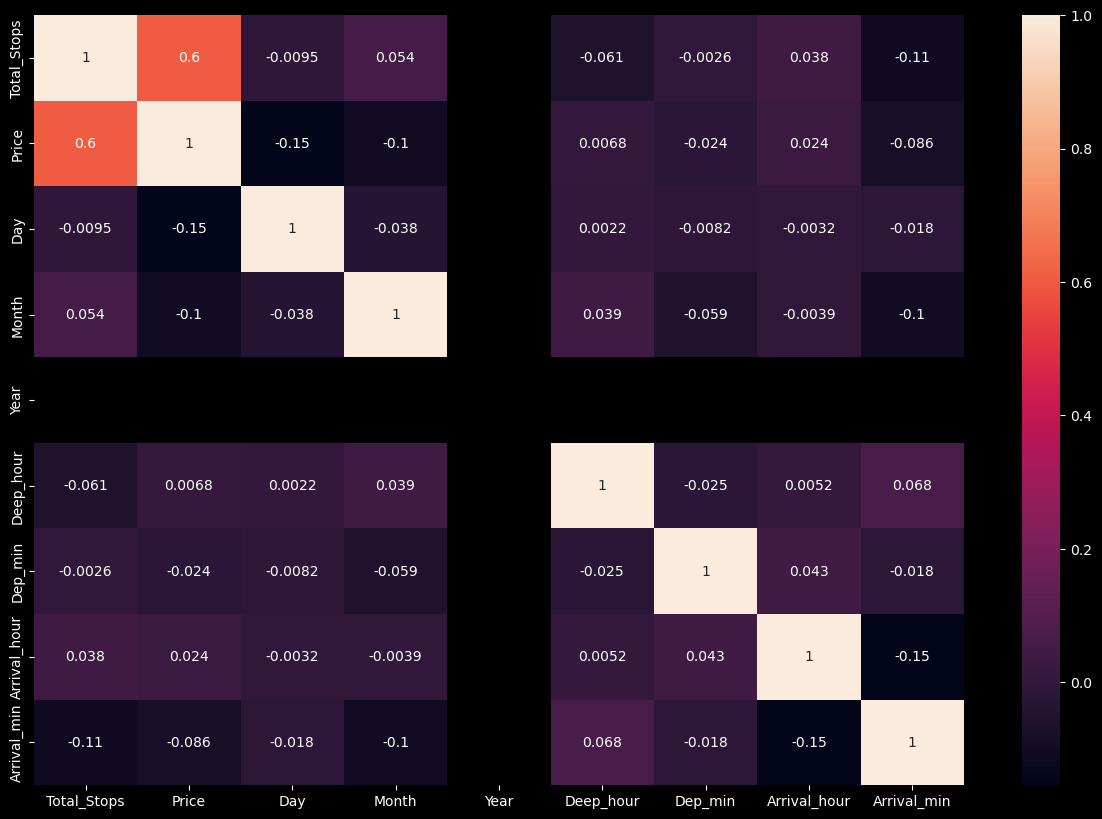

In [51]:
# Heatmap
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
sns.heatmap(df.corr(),annot = True,) #cmap = "RdYlGn")

#Final Dataframe: 
* Now we’ll join all of the One-hot and Label-encoded features to the original
data frame to make the final data frame. We’ll also get rid of the old variables that we used to
create the new encoded variables.


In [52]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Deep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,16,50,21,35


In [53]:
df.isnull().sum()

Airline         0
Source          0
Destination     0
Duration        0
Total_Stops     0
Price           0
Day             0
Month           0
Year            0
Deep_hour       0
Dep_min         0
Arrival_hour    0
Arrival_min     0
dtype: int64

In [54]:
#Concatenate dataframe --> df+ Airline + Source + Destination
data_train=pd.concat([df,Airline , Source, Destination],axis=1)
# we have drop the varibles
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data_train.head()


,Duration,Total_Stops,Price,Day,Month,Year,Deep_hour,Dep_min,Arrival_hour,Arrival_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0,3897,24,3,2019,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2,7662,1,5,2019,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,19h,2,13882,9,6,2019,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,5h 25m,1,6218,12,5,2019,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,4h 45m,1,13302,1,3,2019,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [55]:
data_train.columns.unique()

Index(['Duration', 'Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Deep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [56]:
data_train.shape

(10682, 31)

In [57]:
data_train.isnull().sum()

Duration                             0
Total_Stops                          0
Price                                0
Day                                  0
Month                                0
Year                                 0
Deep_hour                            0
Dep_min                              0
Arrival_hour                         0
Arrival_min                          0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                   

In [58]:
data_train.shape

(10682, 31)

As a result, the final data frame has 32 variables, including the dependent variable
‘Price.’ For training, there are only 29variables.
As a result, the final data frame has 30 variables, including the dependent variable
‘Price.’ For training, there are only 29variables.

In [59]:
# importing dataset
test_data=pd.read_excel("flight_price.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [60]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [61]:
# Building Machine Learning Model using Random Forest Algorithm
data_train.columns.unique()

Index(['Duration', 'Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Deep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [62]:
x=data_train

In [63]:
x.head()

,Duration,Total_Stops,Price,Day,Month,Year,Deep_hour,Dep_min,Arrival_hour,Arrival_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0,3897,24,3,2019,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2,7662,1,5,2019,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,19h,2,13882,9,6,2019,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,5h 25m,1,6218,12,5,2019,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,4h 45m,1,13302,1,3,2019,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [64]:
# dependent feature
y=data_train['Price']

In [65]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [66]:
X=data_train.drop(['Price'],axis=1)
y=data_train.Price

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [70]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))